<a href="https://colab.research.google.com/github/kshitijnatu/EmployeeDatabaseProject/blob/main/Kshitij_Natu_Frequency_Analysis_of_Smart_Contract_Risks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Frequency Analysis of Smart Contract Risks

Welcome to this interactive tutorial on conducting advanced frequency analysis using Python in Google Colab!

## Objective
The objective of this notebook is to teach you how to handle larger datasets and create dynamic visualizations to analyze the frequency of risk tags associated with smart contracts. This will involve loading data, performing data manipulation, and visualizing the results using Python libraries such as pandas, matplotlib, and seaborn.

## Before You Start
This notebook assumes you have some familiarity with basic programming concepts and a basic understanding of Python. If you are completely new to Python, I recommend reviewing Python basics before proceeding.

Let's get started by setting up our environment and loading the data!


### Step 1: Import libraries

In [12]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Display plots inline
%matplotlib inline



### Step 2: Download the dataset

Please note that the dataset that will be downloaded below is a dummy dataset that has been designed for the tutorial. You need to use the actualy dataset provided to you for the analysis.

In [13]:
# !gdown 1NYR65tYzMe4Rwc0kFyTEj2nerJJFRf6n
!gdown 1andAuermOWqVXfhsh_AQ3Db93D3BIqgx

Downloading...
From: https://drive.google.com/uc?id=1andAuermOWqVXfhsh_AQ3Db93D3BIqgx
To: /content/compiled_risk_data.xlsx
100% 310k/310k [00:00<00:00, 90.0MB/s]


In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
print("Setup complete. Imported pandas, seaborn, and matplotlib. Downloaded Webacy dummy dataset.")

Setup complete. Imported pandas, seaborn, and matplotlib. Downloaded Webacy dummy dataset.


### Step 3: Load the Data Section

Now even though we have downloaded the dataset, we still need to load it into our Python environment. For this we will utilize the Pandas library.

In [16]:
# Loading the dataset

df = pd.read_excel('compiled_risk_data.xlsx')

# Display the first five rows of the dataframe
df.head()

,project_name,Smart contract address,Blog post link,Audit website,Chain,Is_closed_source,hidden_owner,anti_whale_modifiable,Is_anti_whale,Is_honeypot,...,centralized_risk_high,centralized_risk_low,event_setter,external_dependencies,immutable_states,reentrancy_without_eth_transfer,incorrect_inheritance_order,shadowing_local,events_maths,Summary/rationale of risk tags marked true
0,Data Analytics,384571416209d08623c6ace9422613fc8970475d,https://chainsecurity.com/security-audit/circl...,https://chainsecurity.com,Ethereum,False,False,False,False,False,...,False,False,True,True,True,True,False,False,False,Bad Contract: Assigned for flaws that indicate...
1,Data Analytics,0xAb5801a7D398351b8bE11C439e05C5B3259ae9B,https://stackoverflow.com/questions/75030483/w...,https://studygroup.moralis.io/t/compilation-er...,Ethereum,False,False,True,True,False,...,False,True,False,True,False,False,True,False,True,Summary/rationale of risk tags marked true: Th...
2,Data Analytics,0x4B20993Bc481177ec7E8f571ceCaE8A9e22C02db,https://stackoverflow.com/questions/71115106/s...,https://ethereum.stackexchange.com/questions/1...,Ethereum,True,False,False,True,False,...,False,True,False,True,False,False,False,True,True,NaN
3,Data Analytics,0x78731D3Ca6b7E34aC0F824c42a7cC18A495cabaB,https://stackoverflow.com/questions/75030483/w...,https://studygroup.moralis.io/t/compilation-er...,Ethereum,True,False,False,False,True,...,False,True,False,False,True,True,False,False,True,NaN
4,Data Analytics,0x617F2E2fD72FD9D5503197092aC168c91465E7f2,https://stackoverflow.com/questions/69466137/h...,https://ethereum.stackexchange.com/questions/1...,Ethereum,True,False,True,False,True,...,False,False,True,True,False,True,False,False,True,The smart contract is marked with risks such a...


In [17]:
# We can then visualize other aspects of the data.
# For example, check for data types and null values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1093 entries, 0 to 1092
Data columns (total 38 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   project_name                                1093 non-null   object
 1   Smart contract address                      1093 non-null   object
 2   Blog post link                              1093 non-null   object
 3   Audit website                               1093 non-null   object
 4   Chain                                       1093 non-null   object
 5   Is_closed_source                            1093 non-null   bool  
 6   hidden_owner                                1093 non-null   bool  
 7   anti_whale_modifiable                       1093 non-null   bool  
 8   Is_anti_whale                               1093 non-null   bool  
 9   Is_honeypot                                 1093 non-null   bool  
 10  buy_tax                 

### Frequency Analysis

In [18]:
# Let's now look at the value counts of an individual risk tag: is_airdrop_scam

df['is_airdrop_scam'].value_counts()

is_airdrop_scam
False    1024
True       69
Name: count, dtype: int64

Okay so we see that over 50% of the dataset has True for the column `is_airdrop_scam`. Note that this is a dummy dataset and in real world you won't have that many scams, atleast we can hope that we don't that many scams.

Now, let's define all the risk columns in our dataset so that we can then run the analysis on the same.

In [19]:
risk_columns = ['Is_closed_source', 'hidden_owner', 'anti_whale_modifiable',
       'Is_anti_whale', 'Is_honeypot', 'buy_tax', 'sell_tax',
       'slippage_modifiable', 'Is_blacklisted', 'can_take_back_ownership',
       'owner_change_balance', 'is_airdrop_scam', 'selfdestruct', 'trust_list',
       'is_whitelisted', 'is_fake_token', 'illegal_unicode', 'exploitation',
       'bad_contract', 'reusing_state_variable', 'encode_packed_collision',
       'encode_packed_parameters', 'centralized_risk_medium',
       'centralized_risk_high', 'centralized_risk_low', 'event_setter',
       'external_dependencies', 'immutable_states',
       'reentrancy_without_eth_transfer', 'incorrect_inheritance_order',
       'shadowing_local', 'events_maths']

Now that we know all the risk columns let's do a full frequency analysis on these columns.

In [23]:
# Calculating the frequency of 'True' in each risk tag column
frequencies = df[risk_columns].apply(lambda x: x.value_counts()).loc[True]
frequencies = frequencies.fillna(0)  # Replace NaN with 0 for any column that may not have True values
frequencies.sort_values(ascending=False)
# print(frequencies.mean())
# print(frequencies.median())

exploitation                       468
bad_contract                       373
external_dependencies              316
centralized_risk_medium            283
owner_change_balance               222
centralized_risk_high              205
reentrancy_without_eth_transfer    199
can_take_back_ownership            194
centralized_risk_low               190
hidden_owner                       164
Is_anti_whale                      155
immutable_states                   154
events_maths                       149
event_setter                       149
slippage_modifiable                149
trust_list                         149
Is_closed_source                   146
buy_tax                            128
sell_tax                           126
reusing_state_variable             124
anti_whale_modifiable              122
selfdestruct                       116
is_whitelisted                     109
incorrect_inheritance_order        100
Is_honeypot                         94
is_fake_token            

In [21]:
# Calculating the frequency of 'False' in each risk tag column
false_frequencies = df[risk_columns].apply(lambda x: x.value_counts()).loc[False]
false_frequencies = false_frequencies.fillna(0)  # Replace NaN with 0 for any column that may not have False values
false_frequencies

Is_closed_source                    947
hidden_owner                        929
anti_whale_modifiable               971
Is_anti_whale                       938
Is_honeypot                         999
buy_tax                             965
sell_tax                            967
slippage_modifiable                 944
Is_blacklisted                     1012
can_take_back_ownership             899
owner_change_balance                871
is_airdrop_scam                    1024
selfdestruct                        977
trust_list                          944
is_whitelisted                      984
is_fake_token                      1003
illegal_unicode                    1031
exploitation                        625
bad_contract                        720
reusing_state_variable              969
encode_packed_collision            1012
encode_packed_parameters           1006
centralized_risk_medium             810
centralized_risk_high               888
centralized_risk_low                903


Now that we have the frequencies, we can also visualize these using a barchart

<ipython-input-22-4db283aabe4f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=frequencies.index, y=frequencies.values, palette='viridis')


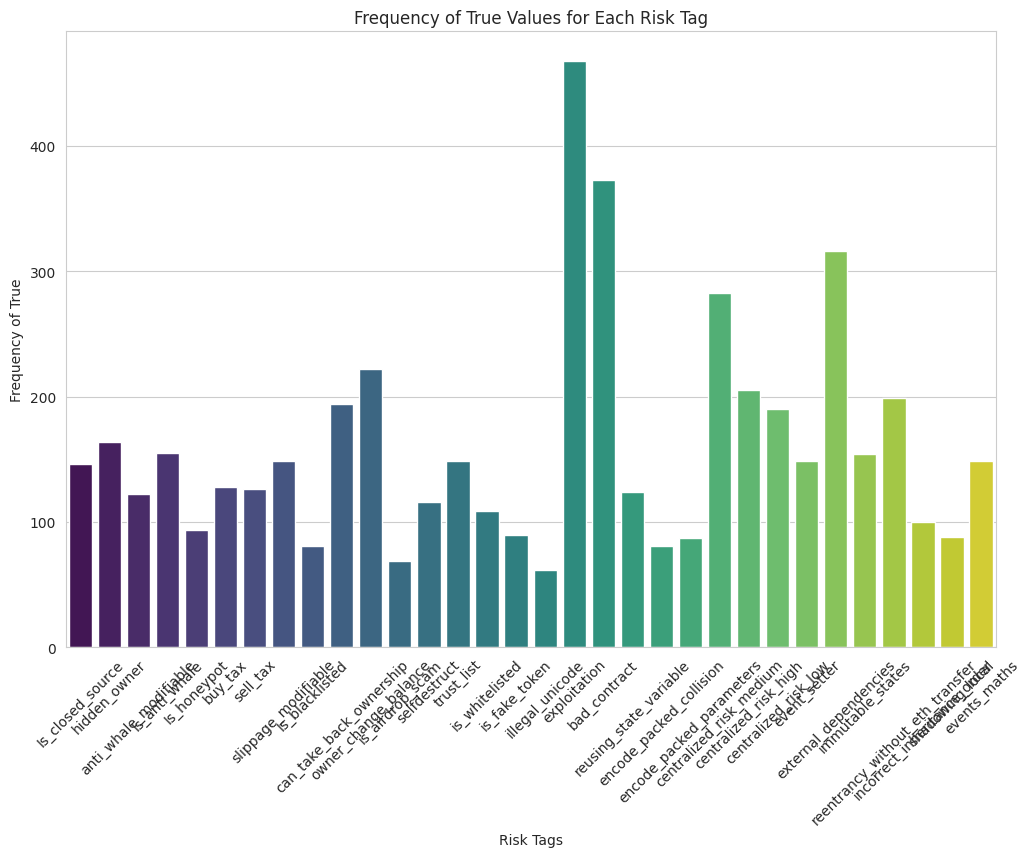

In [22]:
# Visualizing the frequencies using a bar chart
sns.set_style("whitegrid")
plt.figure(figsize=(12, 8))
sns.barplot(x=frequencies.index, y=frequencies.values, palette='viridis')
plt.title('Frequency of True Values for Each Risk Tag')
plt.xlabel('Risk Tags')
plt.ylabel('Frequency of True')
plt.xticks(rotation=45)
plt.show()


**Again note that this is a dummy dataset. Your frequencies might be significantly lower than this with the real dataset.**

# Conclusion
Great job! You have successfully completed a frequency analysis of risk tags in smart contracts using Python. You've learned how to load data, perform calculations, and visualize the results using some of the most powerful libraries in Python.

## Next Steps
- Try modifying the charts or calculations to explore other aspects of the data.
- Consider analyzing the frequency of 'False' values or other specific conditions.
- Use this notebook as a template for analyzing other datasets.

Remember, the skills you've learned here are applicable to a wide range of data analysis tasks. Keep practicing and exploring!

Thank you for following along, and happy coding!


## Tips for Further Learning
- Explore the [pandas documentation](https://pandas.pydata.org/pandas-docs/stable/) for more advanced data manipulation techniques.
- Dive deeper into [matplotlib](https://matplotlib.org/stable/contents.html) and [seaborn](https://seaborn.pydata.org/) to discover more visualization styles and options.
- Participate in online forums and communities to enhance your learning and connect with other learners.
